In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from utils import load_exiobase,aggregate_sectors, aggregation, compute_total_damage,plot_production_evolution
from damage_propagation import propagation_lost_capacity_proportion, propagation_recovery, propagation_rebuilding

In [2]:
a=load_exiobase(2022)

In [10]:
aggreg_base=aggregation(a,country='France',specific_sector='steel', rebuilding=1)

In [11]:
aggreg_base.Z

region                        ROW                                    France  \
sector                      other  construction         steel         other   
region sector                                                                 
ROW    other         7.175311e+07  6.108821e+06  1.174889e+06  3.890688e+05   
       construction  1.198028e+06  9.217299e+05  6.383806e+03  3.269239e+03   
       steel         1.341219e+06  4.655250e+05  9.592840e+05  9.162260e+03   
France other         3.580400e+05  2.536896e+04  2.528850e+03  1.378432e+06   
       construction  8.087256e+02  9.988537e+02  3.497980e+00  1.937696e+04   
       steel         1.177168e+04  1.443273e+03  4.929255e+03  6.261569e+03   

region                                            
sector                construction         steel  
region sector                                     
ROW    other          50089.734846   3555.865780  
       construction    2872.782260     22.298928  
       steel           3079.950796   1315.184295  
France other         130421.331172  13870.594818  
       construction   44074.973346    126.820802  
       steel           2171.742046    927.480945

In [5]:
df1=propagation_rebuilding(base=aggreg_base,value_impact=5000,country='France',sector='steel',psi=0.98)

In [13]:
df=propagation_lost_capacity_proportion(base=aggreg_base,proportion=0.1,country='France',sector='steel',recovery_type='concave',psi=0.85,recovery_time=90,simulation_time=730, duration=7,occurrence=1)

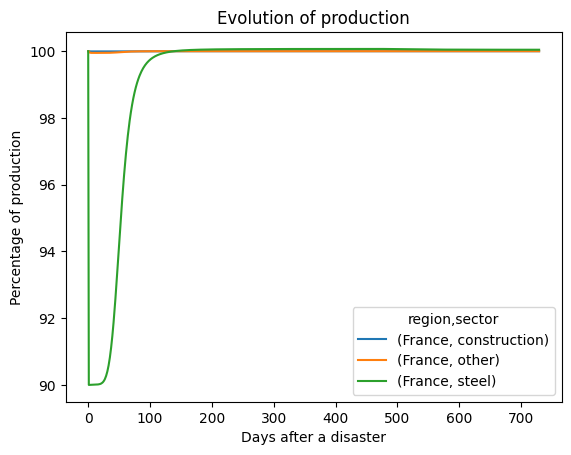

In [16]:
plot_production_evolution(df,'France')